In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
print(tips.head(n=4))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2


In [4]:
# create variables for each of the 4 conditions to graph with matplotlib

menlunchtip = tips.loc[(tips['sex']=='Male')&(tips['time']=='Lunch'), 'tip']
womenlunchtip = tips.loc[(tips['sex']== 'Female')&(tips['time']== 'Lunch'), 'tip']
mendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']== 'Dinner'), 'tip']
womendinnertip = tips.loc[(tips['sex']=='Male')&(tips['time']== 'Dinner'), 'tip']


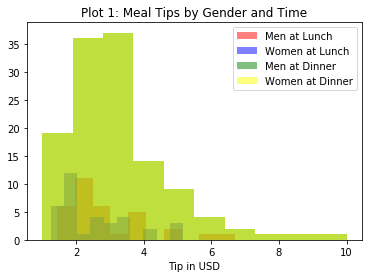

In [5]:
# Create histogram for each variable

plt.hist(menlunchtip, color='red', alpha=.5, label='Men at Lunch')
plt.hist(womenlunchtip, color='blue', alpha=.5, label='Women at Lunch')
plt.hist(mendinnertip, color='green', alpha=.5, label='Men at Dinner')
plt.hist(womendinnertip, color='yellow', alpha=.5, label='Women at Dinner')
plt.xlabel('Tip in USD')
plt.legend(loc='upper right')
plt.title('Plot 1: Meal Tips by Gender and Time')
plt.show()

In [6]:
# Showing the information in a seaborn faucet
sns.set(style='ticks') # setting the aeesthetic


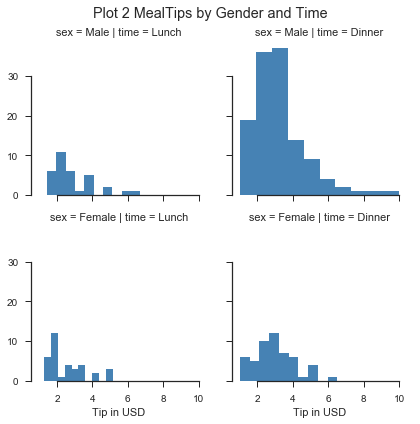

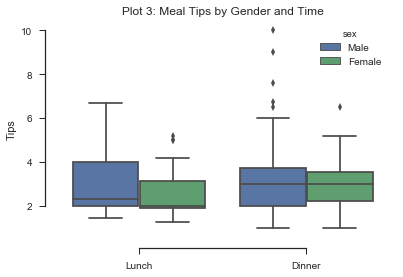

In [10]:
# explaining data to seaborn
g = sns.FacetGrid(tips, row='sex', col='time')

# Name plot type and the variable to be plotted
g.map(plt.hist, 'tip', color='steelblue', lw=0)

# Move the plot apart to make room for titles
plt.subplots_adjust(top=.9)
# Making a more informative axis name
g.set_axis_labels('Tip in USD')
plt.suptitle('Plot 2 MealTips by Gender and Time')
# Removing excess lines around the plot
sns.despine(trim=True)
plt.show()

#Comparing groups ising boxplots
ax = sns.boxplot(x='time', y='tip', hue='sex', data=tips)
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

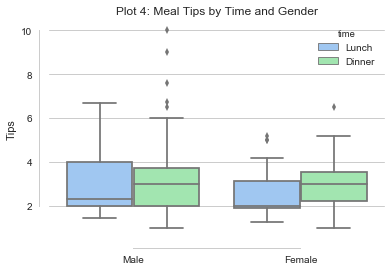

In [13]:
# Comparing groups again, but with a different emphasis

# Setting the aesthetic

sns.set(style='whitegrid')

ax = sns.boxplot(x='sex', y='tip', hue='time', data=tips, palette='pastel')

plt.title('Plot 4: Meal Tips by Time and Gender')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Tips')

plt.show()

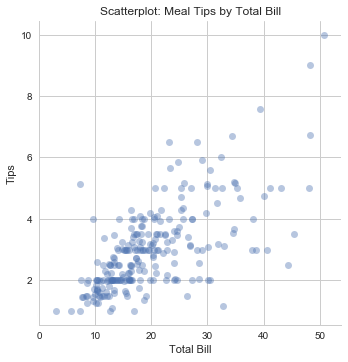

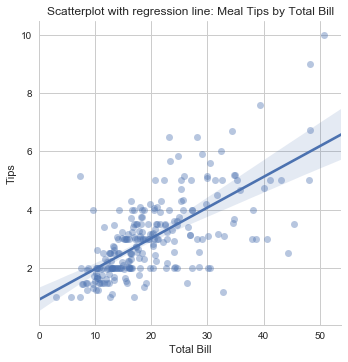

In [14]:
g = sns.lmplot(y='tip', # Variable 1.
               x='total_bill', # Variable 2.
               data=tips, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot: Meal Tips by Total Bill')
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               data=tips, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.title('Scatterplot with regression line: Meal Tips by Total Bill')
plt.show()

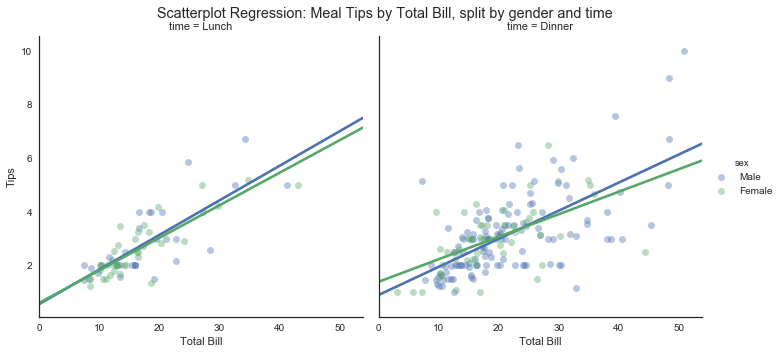

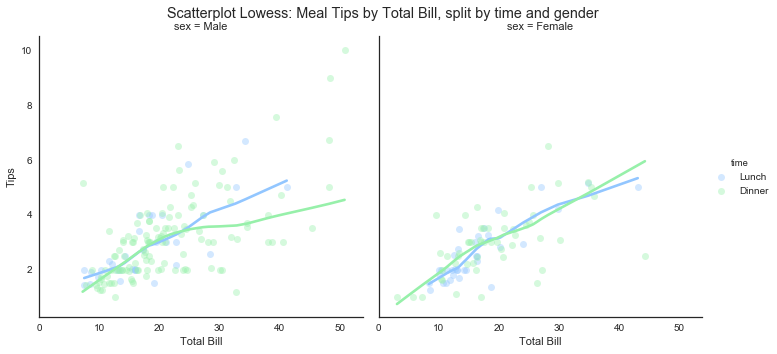

In [15]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='sex',
               data=tips, # Data.
               col='time',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='time',
               data=tips, # Data.
               col='sex',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()